In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
os.chdir("C:\\Users\\Hunsoo\\Desktop\\regression_practice")

#dataset_path = os.path.join(os.getcwd(),"Data")
#dataset_path

In [2]:
os.getcwd()

'C:\\Users\\Hunsoo\\Desktop\\regression_practice'

In [3]:
raw_dataset = pd.read_csv('YA_2015_2017_data_GMT.txt',sep="\t", header=0)
raw_dataset.head(20)

,point,year,month,day,day365,clock,GMT,temp,windspeed,winddirection,...,pv_4h,pv_3h,pv_2h,pv_1h,pv0h,pv1h,pv2h,pv3h,pv4h,pv5h
0,165,2015,1,1,1,0,15,-1.2,7.6,NaN,...,0,0,0,0,0,0,0,0,0,0
1,165,2015,1,1,1,1,16,-1.8,10.4,NaN,...,0,0,0,0,0,0,0,0,0,0
2,165,2015,1,1,1,2,17,-1.7,10.9,NaN,...,0,0,0,0,0,0,0,0,0,0
3,165,2015,1,1,1,3,18,-1.6,11.6,NaN,...,0,0,0,0,0,0,0,0,0,5
4,165,2015,1,1,1,4,19,-1.8,10.8,NaN,...,0,0,0,0,0,0,0,0,5,139
5,165,2015,1,1,1,5,20,-1.6,9.7,340.0,...,0,0,0,0,0,0,0,5,139,732
6,165,2015,1,1,1,6,21,-2.3,7.2,340.0,...,0,0,0,0,0,0,5,139,732,590
7,165,2015,1,1,1,7,22,-2.7,8.3,NaN,...,0,0,0,0,0,5,139,732,590,787
8,165,2015,1,1,1,8,23,-2.7,10.5,NaN,...,0,0,0,0,5,139,732,590,787,327
9,165,2015,1,1,1,9,0,-2.0,9.7,NaN,...,0,0,0,5,139,732,590,787,327,588


In [4]:
raw_dataset['month'] = raw_dataset['month'].apply(lambda x: '{0:0>2}'.format(x))

raw_dataset['day'] = raw_dataset['day'].apply(lambda x: '{0:0>2}'.format(x))

raw_dataset['clock'] = raw_dataset['clock'].apply(lambda x: '{0:0>2}'.format(x))

raw_dataset['GMT'] = raw_dataset['GMT'].apply(lambda x: '{0:0>2}'.format(x))

In [5]:
raw_dataset.head(20)

,point,year,month,day,day365,clock,GMT,temp,windspeed,winddirection,...,pv_4h,pv_3h,pv_2h,pv_1h,pv0h,pv1h,pv2h,pv3h,pv4h,pv5h
0,165,2015,01,01,1,00,15,-1.2,7.6,NaN,...,0,0,0,0,0,0,0,0,0,0
1,165,2015,01,01,1,01,16,-1.8,10.4,NaN,...,0,0,0,0,0,0,0,0,0,0
2,165,2015,01,01,1,02,17,-1.7,10.9,NaN,...,0,0,0,0,0,0,0,0,0,0
3,165,2015,01,01,1,03,18,-1.6,11.6,NaN,...,0,0,0,0,0,0,0,0,0,5
4,165,2015,01,01,1,04,19,-1.8,10.8,NaN,...,0,0,0,0,0,0,0,0,5,139
5,165,2015,01,01,1,05,20,-1.6,9.7,340.0,...,0,0,0,0,0,0,0,5,139,732
6,165,2015,01,01,1,06,21,-2.3,7.2,340.0,...,0,0,0,0,0,0,5,139,732,590
7,165,2015,01,01,1,07,22,-2.7,8.3,NaN,...,0,0,0,0,0,5,139,732,590,787
8,165,2015,01,01,1,08,23,-2.7,10.5,NaN,...,0,0,0,0,5,139,732,590,787,327
9,165,2015,01,01,1,09,00,-2.0,9.7,NaN,...,0,0,0,5,139,732,590,787,327,588


In [6]:
raw_dataset.shape

(26280, 38)

In [7]:
coms_data_ir1 = []
coms_data_ir2 = []
coms_data_wv = []
coms_data_swir = []
coms_data_vis = []

In [8]:
pv_row=682
pv_col=503

In [9]:
for i in range(len(raw_dataset)):
    year_i=raw_dataset.year[i]
    month_i=raw_dataset.month[i]
    day_i=raw_dataset.day[i]
    GMT_i=raw_dataset.GMT[i]
    path_name = 'E:\\COMS\\'+'Y'+str(year_i)+'\\'+'M'+str(month_i)+'\\'+'D'+str(day_i)+'\\'
    os.chdir(path_name)
    #print(os.listdir(path_name))
    
    # ir1
    file_name = 'coms_le1b_ir1_ch1_k_'+str(year_i)+str(month_i)+str(day_i)+str(GMT_i)+'00.bin'
    if os.path.exists(file_name):
        f = open(file_name,'rb')
        bdata = np.fromfile(f,dtype=">u2",count=-1)
        bdata_np_reshape = np.reshape(bdata,[1024,1024])
        #plt.imshow(bdata_np_reshape)
        #plt.figure()
        #print(bdata_np_reshape[500,500])
        coms_data_ir1.append(bdata_np_reshape[pv_row,pv_col])
    else:
        print("skip")
        coms_data_ir1.append("skip")
    
    # ir2
    file_name = 'coms_le1b_ir2_ch2_k_'+str(year_i)+str(month_i)+str(day_i)+str(GMT_i)+'00.bin'
    if os.path.exists(file_name):
        f = open(file_name,'rb')
        bdata = np.fromfile(f,dtype=">u2",count=-1)
        bdata_np_reshape = np.reshape(bdata,[1024,1024])
        #plt.imshow(bdata_np_reshape)
        #plt.figure()
        #print(bdata_np_reshape[500,500])
        coms_data_ir2.append(bdata_np_reshape[pv_row,pv_col])
    else:
        print("skip")
        coms_data_ir2.append("skip")
        

    # wv
    file_name = 'coms_le1b_wv_ch3_k_'+str(year_i)+str(month_i)+str(day_i)+str(GMT_i)+'00.bin'
    if os.path.exists(file_name):
        f = open(file_name,'rb')
        bdata = np.fromfile(f,dtype=">u2",count=-1)
        bdata_np_reshape = np.reshape(bdata,[1024,1024])
        #plt.imshow(bdata_np_reshape)
        #plt.figure()
        #print(bdata_np_reshape[500,500])
        coms_data_wv.append(bdata_np_reshape[pv_row,pv_col])
    else:
        print("skip")
        coms_data_wv.append("skip")
        
    # swir
    file_name = 'coms_le1b_swir_ch4_k_'+str(year_i)+str(month_i)+str(day_i)+str(GMT_i)+'00.bin'
    if os.path.exists(file_name):
        f = open(file_name,'rb')
        bdata = np.fromfile(f,dtype=">u2",count=-1)
        bdata_np_reshape = np.reshape(bdata,[1024,1024])
        #plt.imshow(bdata_np_reshape)
        #plt.figure()
        #print(bdata_np_reshape[500,500])
        coms_data_swir.append(bdata_np_reshape[pv_row,pv_col])
    else:
        print("skip")
        coms_data_swir.append("skip")
        
    # vis
    file_name = 'coms_le1b_vis_ch5_k_'+str(year_i)+str(month_i)+str(day_i)+str(GMT_i)+'00.bin'
    if os.path.exists(file_name):
        f = open(file_name,'rb')
        bdata = np.fromfile(f,dtype=">u2",count=-1)
        bdata_np_reshape = np.reshape(bdata,[1024,1024])
        #plt.imshow(bdata_np_reshape)
        #plt.figure()
        #print(bdata_np_reshape[500,500])
        coms_data_vis.append(bdata_np_reshape[pv_row,pv_col])
    else:
        print("skip")
        coms_data_vis.append("skip")
    

skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip


In [10]:
raw_dataset.head(20)

,point,year,month,day,day365,clock,GMT,temp,windspeed,winddirection,...,pv_4h,pv_3h,pv_2h,pv_1h,pv0h,pv1h,pv2h,pv3h,pv4h,pv5h
0,165,2015,01,01,1,00,15,-1.2,7.6,NaN,...,0,0,0,0,0,0,0,0,0,0
1,165,2015,01,01,1,01,16,-1.8,10.4,NaN,...,0,0,0,0,0,0,0,0,0,0
2,165,2015,01,01,1,02,17,-1.7,10.9,NaN,...,0,0,0,0,0,0,0,0,0,0
3,165,2015,01,01,1,03,18,-1.6,11.6,NaN,...,0,0,0,0,0,0,0,0,0,5
4,165,2015,01,01,1,04,19,-1.8,10.8,NaN,...,0,0,0,0,0,0,0,0,5,139
5,165,2015,01,01,1,05,20,-1.6,9.7,340.0,...,0,0,0,0,0,0,0,5,139,732
6,165,2015,01,01,1,06,21,-2.3,7.2,340.0,...,0,0,0,0,0,0,5,139,732,590
7,165,2015,01,01,1,07,22,-2.7,8.3,NaN,...,0,0,0,0,0,5,139,732,590,787
8,165,2015,01,01,1,08,23,-2.7,10.5,NaN,...,0,0,0,0,5,139,732,590,787,327
9,165,2015,01,01,1,09,00,-2.0,9.7,NaN,...,0,0,0,5,139,732,590,787,327,588


In [12]:
np.shape(raw_dataset)

(26280, 38)

In [13]:
import copy

In [16]:
raw_dataset_with_coms_pix['coms_data_ir1']=coms_data_ir1
raw_dataset_with_coms_pix['coms_data_ir2']=coms_data_ir2
raw_dataset_with_coms_pix['coms_data_wv']=coms_data_wv
raw_dataset_with_coms_pix['coms_data_swir']=coms_data_swir
raw_dataset_with_coms_pix['coms_data_vis']=coms_data_vis

In [17]:
np.shape(raw_dataset_with_coms_pix)

(26280, 43)

In [19]:
raw_dataset_with_coms_pix.head(10)

,point,year,month,day,day365,clock,GMT,temp,windspeed,winddirection,...,pv1h,pv2h,pv3h,pv4h,pv5h,coms_data_ir1,coms_data_ir2,coms_data_wv,coms_data_swir,coms_data_vis
0,165,2015,01,01,1,00,15,-1.2,7.6,NaN,...,0,0,0,0,0,706,674,878,936,50
1,165,2015,01,01,1,01,16,-1.8,10.4,NaN,...,0,0,0,0,0,700,670,878,934,47
2,165,2015,01,01,1,02,17,-1.7,10.9,NaN,...,0,0,0,0,0,696,667,877,934,48
3,165,2015,01,01,1,03,18,-1.6,11.6,NaN,...,0,0,0,0,5,691,662,877,933,49
4,165,2015,01,01,1,04,19,-1.8,10.8,NaN,...,0,0,0,5,139,684,658,876,931,50
5,165,2015,01,01,1,05,20,-1.6,9.7,340.0,...,0,0,5,139,732,667,637,872,925,49
6,165,2015,01,01,1,06,21,-2.3,7.2,340.0,...,0,5,139,732,590,667,639,867,926,49
7,165,2015,01,01,1,07,22,-2.7,8.3,NaN,...,5,139,732,590,787,678,657,868,931,51
8,165,2015,01,01,1,08,23,-2.7,10.5,NaN,...,139,732,590,787,327,671,646,867,923,58
9,165,2015,01,01,1,09,00,-2.0,9.7,NaN,...,732,590,787,327,588,669,641,873,913,99


In [20]:
raw_dataset= copy.deepcopy(raw_dataset_with_coms_pix)

In [ ]:
#raw_dataset_with_coms_pix= copy.deepcopy(raw_dataset)

In [21]:
raw_dataset.clock=pd.to_numeric(raw_dataset.clock)  ## clock 01, 02, 03 --> 1, 2, 3

In [22]:
raw_dataset.drop(raw_dataset[raw_dataset.clock<9].index,inplace=True)
raw_dataset.drop(raw_dataset[raw_dataset.clock>19].index,inplace=True)

In [23]:
raw_dataset.head()

,point,year,month,day,day365,clock,GMT,temp,windspeed,winddirection,...,pv1h,pv2h,pv3h,pv4h,pv5h,coms_data_ir1,coms_data_ir2,coms_data_wv,coms_data_swir,coms_data_vis
9,165,2015,01,01,1,9,00,-2.0,9.7,NaN,...,732,590,787,327,588,669,641,873,913,99
10,165,2015,01,01,1,10,01,-0.9,10.9,NaN,...,590,787,327,588,226,681,654,872,908,195
11,165,2015,01,01,1,11,02,-1.1,8.5,NaN,...,787,327,588,226,69,694,665,870,904,254
12,165,2015,01,01,1,12,03,-0.7,9.7,NaN,...,327,588,226,69,3,656,629,871,871,256
13,165,2015,01,01,1,13,04,-1.6,9.6,NaN,...,588,226,69,3,0,706,679,870,824,252


In [261]:
####################################################################################################################################

In [421]:
fields_to_drop = ['point','year','month','clock','day365','day','GMT','temp','windspeed','winddirection','humidity',\
                  'vaporpressure','dewpointtemperature','locarpressure','seasurfacepressure','sunshine',\
                  'irradiation','snow','cloud','cloud2','lowcloud','sijung','lst','temp5cm','temp10cm',\
                  'temp20','temp30cm','pv_5h','pv_4h','pv_3h','pv_2h','pv_1h','pv1h',\
                  'pv3h','pv4h','pv5h','coms_data_ir1','coms_data_ir2','coms_data_wv','coms_data_swir','coms_data_vis']
data = raw_dataset.drop(fields_to_drop, axis=1)
data.head()

dataset = data.copy()
dataset.head()

,pv0h,pv2h
9,139,590
10,732,787
11,590,327
12,787,588
13,327,226


In [422]:
dataset.shape

(12045, 2)

In [423]:
dataset=dataset.dropna()

In [424]:
dataset.head()

,pv0h,pv2h
9,139,590
10,732,787
11,590,327
12,787,588
13,327,226


In [425]:
dataset.drop(dataset[dataset.coms_data_ir1=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_ir2=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_wv=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_swir=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_vis=='skip'].index,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'coms_data_ir1'

In [426]:
dataset.head(50)

,pv0h,pv2h
9,139,590
10,732,787
11,590,327
12,787,588
13,327,226
14,588,69
15,226,3
16,69,0
17,3,0
18,0,0


In [389]:
# MINMAX SCALE전 abnormal 값 빼기

from scipy import stats

image_features = ['coms_data_ir1','coms_data_ir2','coms_data_wv','coms_data_swir','coms_data_vis']
dataset['coms_data_ir1']=dataset['coms_data_ir1'].astype(float)
dataset['coms_data_ir2']=dataset['coms_data_ir2'].astype(float)
dataset['coms_data_wv']=dataset['coms_data_wv'].astype(float)
dataset['coms_data_swir']=dataset['coms_data_swir'].astype(float)
dataset['coms_data_vis']=dataset['coms_data_vis'].astype(float)

In [390]:
dataset.head()

,pv0h,pv2h,coms_data_ir1,coms_data_ir2,coms_data_wv,coms_data_swir,coms_data_vis
9,139,590,669.0,641.0,873.0,913.0,99.0
10,732,787,681.0,654.0,872.0,908.0,195.0
11,590,327,694.0,665.0,870.0,904.0,254.0
12,787,588,656.0,629.0,871.0,871.0,256.0
13,327,226,706.0,679.0,870.0,824.0,252.0


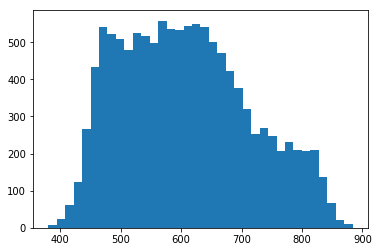

In [391]:
np_coms_data_ir1=np.array(dataset['coms_data_ir1'])
plt.hist(np_coms_data_ir1, bins='auto')
plt.show()

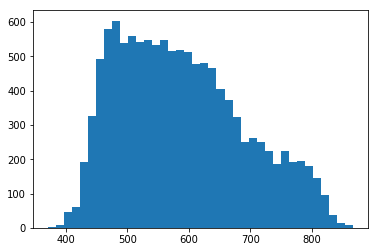

In [392]:
np_coms_data_ir2=np.array(dataset['coms_data_ir2'])
plt.hist(np_coms_data_ir2, bins='auto')
plt.show()

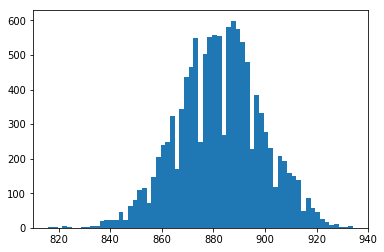

In [393]:
np_coms_data_wv=np.array(dataset['coms_data_wv'])
plt.hist(np_coms_data_wv, bins='auto')
#plt.hist(np_coms_data_wv, bins=500)
plt.show()

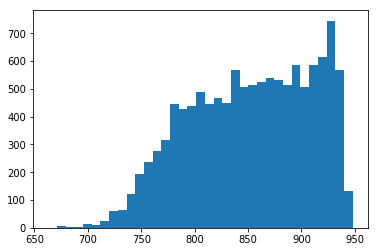

In [394]:
np_coms_data_swir=np.array(dataset['coms_data_swir'])
plt.hist(np_coms_data_swir, bins='auto')
#plt.hist(np_coms_data_swir, bins=500)
plt.show()

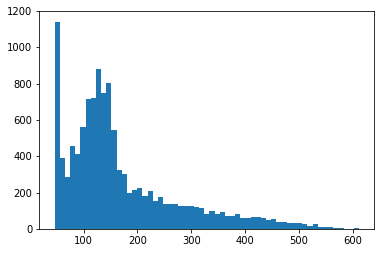

In [395]:
np_coms_data_vis=np.array(dataset['coms_data_vis'])
plt.hist(np_coms_data_vis, bins='auto')
#plt.hist(np_coms_data_vis, bins=500)
plt.show()

In [396]:
##################################   전처리할때 순서를 두면 안됨.. 근데 일단 그냥 함  ######################################

In [397]:
"""dataset_preprocessed=dataset[(np.abs(stats.zscore(dataset['coms_data_ir1'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_ir2'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_wv'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_swir'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_vis'])) < 3)]

np.shape(dataset_preprocessed)""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-397-6260a102bb60>, line 19)

In [427]:
dataset_preprocessed=dataset

In [428]:
dataset_preprocessed.head(10)

,pv0h,pv2h
9,139,590
10,732,787
11,590,327
12,787,588
13,327,226
14,588,69
15,226,3
16,69,0
17,3,0
18,0,0


In [429]:
quant_features = ['pv0h','pv2h']

scaled_features = {}

#for each in quant_features:
#    mean, std = data[each].mean(), data[each].std()
#    scaled_features[each] = [mean, std]
#    data.loc[:, each] = (data[each] - mean)/std

for each in quant_features:
    maxx, minn = dataset_preprocessed[each].max(), dataset_preprocessed[each].min()
    scaled_features[each] = [maxx, minn]
    dataset_preprocessed.loc[:, each] = (dataset_preprocessed[each] - minn)/(maxx-minn)
    
#for each in dataset_preprocessed:
#    maxx, minn = dataset_preprocessed[each].max(), dataset_preprocessed[each].min()
#    scaled_features[each] = [maxx, minn]
#    dataset_preprocessed.loc[:, each] = (dataset_preprocessed[each] - minn)/(maxx-minn)

In [430]:
scaled_features

{'pv0h': [1453, 0], 'pv2h': [1453, 0]}

In [431]:
dataset_preprocessed.head()

,pv0h,pv2h
9,0.095664,0.406056
10,0.503785,0.541638
11,0.406056,0.225052
12,0.541638,0.404680
13,0.225052,0.155540


In [432]:
dataset_preprocessed.shape

(12045, 2)

In [433]:
dataset_preprocessed.head()

,pv0h,pv2h
9,0.095664,0.406056
10,0.503785,0.541638
11,0.406056,0.225052
12,0.541638,0.404680
13,0.225052,0.155540


In [434]:
train_dataset = dataset_preprocessed.sample(frac=0.90,random_state=0)
test_dataset = dataset_preprocessed.drop(train_dataset.index)


train_labels = train_dataset.pop('pv2h')
test_labels = test_dataset.pop('pv2h')

In [435]:
train_dataset.head()

,pv0h
2390,0.751549
12828,0.346180
16022,0.679972
24161,0.033723
14657,0.158981


In [436]:
np.shape(train_dataset)

(10840, 1)

In [437]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[dataset_preprocessed.shape[1]-1]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

model = build_model()

In [438]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1 == 0: print('')
    print('.', end='')

EPOCHS = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [439]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
22,0.036023,0.135855,0.036023,0.036352,0.140077,0.036352,22
23,0.035876,0.135552,0.035876,0.037346,0.133999,0.037346,23
24,0.035971,0.135743,0.035971,0.036474,0.136941,0.036474,24
25,0.035930,0.135928,0.035930,0.036393,0.136470,0.036393,25
26,0.035906,0.135701,0.035906,0.036210,0.135198,0.036210,26


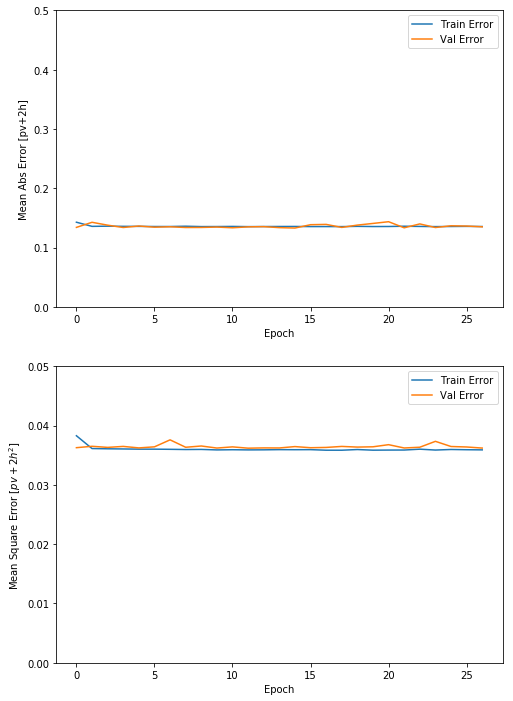

In [440]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(8,12))
  
  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pv+2h]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$pv+2h^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,0.05])
  plt.legend()
  plt.show()

plot_history(history)

In [441]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("테스트 세트의 평균 절대 오차: {:5.2f} pv+2h".format(mae))

테스트 세트의 평균 절대 오차:  0.13 pv+2h


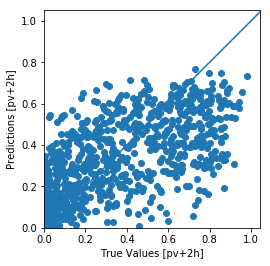

In [442]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pv+2h]')
plt.ylabel('Predictions [pv+2h]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 5000], [-100, 5000])

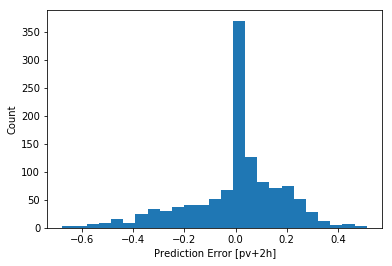

In [443]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [pv+2h]")
_ = plt.ylabel("Count")

In [444]:
array_test_labels=pd.Series(test_labels).values
array_test_predictions=pd.Series(test_predictions).values

In [445]:
rss=((array_test_labels-array_test_predictions)**2).sum()
mse=np.mean((array_test_labels-array_test_predictions)**2)
print("Final rmse value is =",np.sqrt(np.mean((array_test_labels-array_test_predictions)**2)))

Final rmse value is = 0.18538002602470743


In [446]:
print(np.corrcoef(array_test_labels,array_test_predictions))

[[1.         0.75970157]
 [0.75970157 1.        ]]


In [418]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

mape_vectorized_v2(array_test_labels,array_test_predictions)

C:\Users\Hunsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


4.644128212828932

In [419]:
def nmae(a, b, c): 
    mask = a != 0
    return (np.fabs(a - b)/max(c)/9)[mask].mean()

nmae(array_test_labels,array_test_predictions,test_labels)

0.018956274315747982

In [420]:
def nmae_wo_mask(a, b, c): 
    return (np.fabs(a - b)/max(c)/9).mean()

nmae_wo_mask(array_test_labels,array_test_predictions,test_labels)

0.014056378266181738

In [345]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(array_test_labels, array_test_predictions))
print(rms)

0.1776711252847224


In [256]:
array_test_labels

array([0.40605643, 0.        , 0.48176187, ..., 0.14796972, 0.04955265,
       0.        ])

In [573]:
array_test_predictions

array([0.4863639 , 0.01121572, 0.5593446 , ..., 0.19821379, 0.04106001,
       0.00929447], dtype=float32)

In [574]:
mape_vectorized_v2(array_test_labels*100,array_test_predictions*100)

C:\Users\Hunsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


2.2006092400865707

In [411]:
####################################################################################################################################

In [ ]:
for i in range(1,10):
    year_i=raw_dataset.year[i]
    month_i=raw_dataset.day[i]
    day_i=raw_dataset.day[i]
    clock_i=raw_dataset.clock[i]
    path_name = 'E:\\COMS\\'+'Y'+str(year_i)+'\\'+'M'+str(month_i)+'\\'+'D'+str(day_i)+'\\'
    os.chdir(path_name)
    file_name = 'coms_le1b_ir1_ch1_k_'+str(year_i)+str(month_i)+str(day_i)+str(clock_i)+'00.bin'
    
    f = open(file_name,'rb')
    bdata = f.read()
    bdata_np=np.frombuffer(bdata, dtype=np.uint16)
    bdata_np_reshape = np.reshape(bdata_np,[1024,1024])
    plt.imshow(bdata_np_reshape)
    plt.figure()